In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd

In [57]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [59]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [64]:
inspector = inspect(engine)

# Exploratory Climate Analysis

In [65]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [66]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [67]:
engine.execute('Select * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [68]:
engine.execute('Select * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [69]:

#Reflect Database into ORM Class
measurement = Base.classes.measurement
station = Base.classes.measurement

In [70]:

#What is the earliest date
trip_start_date = session.query(measurement.date).order_by(measurement.date).first()
trip_start_date

('2010-01-01')

In [71]:

#What is the latest date
trip_last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
trip_last_date

('2017-08-23')

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#index into the object created from the "latest_date"
trip_last_date = trip_last_date[0]

In [73]:

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(trip_last_date, "%Y-%m-%d") - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
scores_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()
scores_query

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [74]:
# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores_query, columns=['date', 'precipitation'])

# Change datatype
scores_df['date'] = pd.to_datetime(scores_df['date'], format='%Y-%m-%d')

# Set index to date
scores_df.set_index('date', inplace=True)

# Sort the dataframe by date
scores_df = scores_df.sort_values(by='date', ascending=True)



scores_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<function matplotlib.pyplot.show(*args, **kw)>

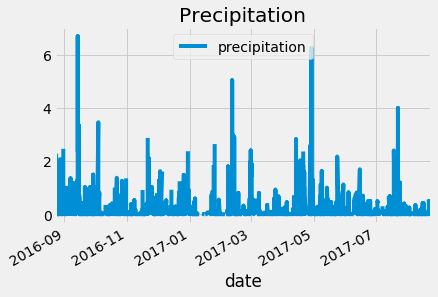

In [75]:
# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(title="Precipitation")
plt.legend(loc='upper center')
plt.savefig("Images/Precipitation.png")
plt.show


In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [77]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()                            
print(f'There are {station_count} weather stations in Hawaii.')


There are 9 weather stations in Hawaii.


In [78]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print("The most active stations are")
station_active

The most active stations are


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_stations = station_active[0][0]
temp_calculation = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_stations).all()

In [80]:
#display temperature highs and lows
print(f"Highs, Lows, and Average Temperature")
print(F"Low: {temp_calculation[0][0]} High: {temp_calculation[0][1]} Average: {temp_calculation[0][1]}")

Highs, Lows, and Average Temperature
Low: 54.0 High: 85.0 Average: 85.0


In [81]:
# Choose the station with the highest number of temperature observations.
highest_observations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
highest_observations = highest_observations[0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query(measurement.tobs).filter(measurement.date>=last_year).filter(measurement.station == highest_observations).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['temperature'])
temperature_observations.head()

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


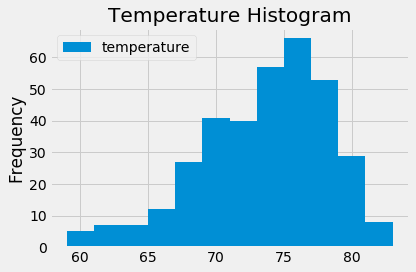

In [82]:
#plot the results as a histogram
temperature_observations.plot.hist(bins=12, title ="Temperature Histogram")
plt.tight_layout()
plt.savefig("Images/TemperatureHistogram.png")
plt.show()

In [83]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [84]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_climate = calc_temps('2017-01-01', '2017-01-10')
trip_climate

[(60.0, 68.0327868852459, 77.0)]

In [85]:
#crate a trip datafram to organize data to plot
trip_df = pd.DataFrame(trip_climate, columns=['Min', 'Avg', 'Max'])
trip_df

,Min,Avg,Max
0,60.0,68.032787,77.0


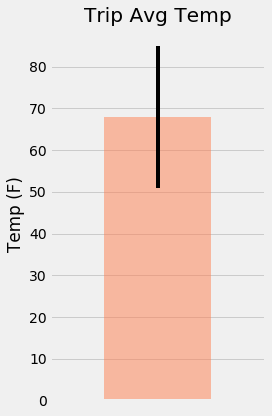

In [86]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df.plot.bar(y='Avg', yerr=(trip_df['Max'] - trip_df['Min']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))

# Use the average temperature for the y value
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Images/Tripbargraph.png")
plt.show()

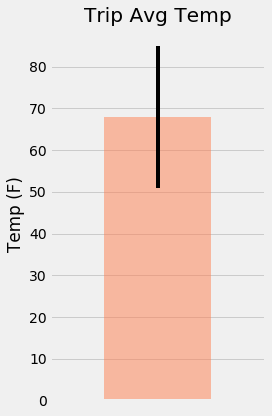

In [87]:
# Plot the results from your previous query as a bar chart
trip_df.plot.bar(y='Avg', yerr=(trip_df['Max'] - trip_df['Min']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6)) 
plt.xticks(np.arange(1, 1.0))


# Use the average temperature for the y value
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Images/Tripbargraph.png")
plt.show()
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [88]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def rainfall(start_date, end_date):
    sel = [measurement.station,
          station.name,
          station.latitude,
          station.longitude,
          station.elevation,
          measurement.prcp]
    return session.query(*sel).filter(measurement.station == station.station).filter(measurement.date >= start_date).filter(measurement.date <= end_date).group_by(measurement.station).order_by(measurement.prcp.desc()).all()
#print(rainfall('2017-01-01','2017-01-10'))


## Optional Challenge Assignment

In [89]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [90]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

TripStartTime= '2016-08-21'
TripEndTime = '2016-08-30'

FirstStep = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
PlaceForTrip = session.query(*FirstStep).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= TripStartTime).\
    filter(Measurement.date <= TripEndTime).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print (PlaceForTrip)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 7.560000000000001), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 7.479999999999999), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.16), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2.55), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.4), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.69), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.06)]


In [91]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


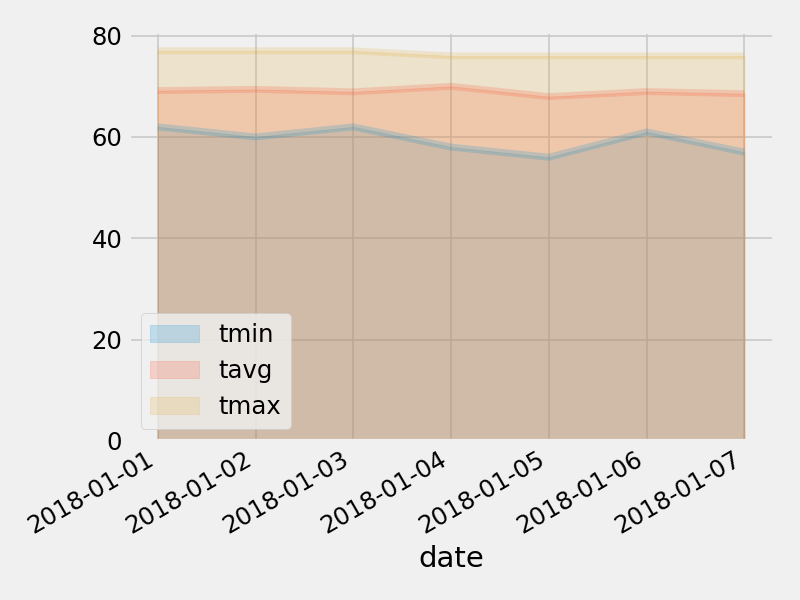

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
